## Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from datetime import date

%matplotlib inline

## Import datasets

In [2]:
df_train = pd.read_csv('./datasets/train.csv')
df_test_set = pd.read_csv('./datasets/test.csv')

In [3]:
df_test_set.shape

(878, 80)

## Clean datasets
Combine train and datasets, which will be split again later on
<br>Remove all non-residential type properties

In [4]:
# Clean data
# Merge test and train datasets first

df = df_train.copy()
df_test = df_test_set.copy()

# Drop non-residential zonings


In [5]:
for x in (df, df_test):
    x.drop(x[(x['MS Zoning'] == 'I (all)') | (x['MS Zoning'] == 'C (all)') | (x['MS Zoning'] == 'A (agr)')].index, inplace=True)

## Investigate independent variables

Classifying independent variables into categories..we may look to selecting an appropriate variable for each to avoid collinearity.
<br>Furthermore, this allows for simple interpretability of our model later on.
<br>We will select an independent variable from each category type.

|Column Name|Category|Variable Type|  
| --- | --- | --- |
|   Id               |Identifier|Discrete |
|   PID              |Identifier|Nominal |
|   MS SubClass      |General|Nominal|
|  Bldg Type        |General|Nominal|
|  House Style      |General|Nominal|
|  __Overall Qual__     |General|Nominal (num scale)|
|  Overall Cond     |General|Nominal (num scale)|
|  Functional       |General|Ordinal|
|   __MS Zoning__        |Location|Nominal|
|  Neighborhood     |Location|Nominal|
|  Condition 1      |Location|Nominal|
|  Condition 2      |Location|Nominal|
|   Lot Frontage     |Land|Continuous|
|   __Lot Area__         |Land|Continuous|
|   Lot Shape        |Land|Ordinal|
|   Land Contour     |Land|Nominal|
|  Lot Config       |Land|Nominal|
|  Land Slope       |Land|Ordinal|
|   Street           |Accessibility|Nominal|
|   Alley            |Accessibility|Nominal|
|  Year Built       |Age|Discrete|
|  __Year Remod/Add__   |Age|Discrete|
|  Roof Style       |Roof|Nominal|
|  Roof Matl        |Roof|Nominal|
|  Exterior 1st     |Exterior|Nominal|
|  Exterior 2nd     |Exterior|Nominal|
|  Mas Vnr Type     |Exterior|Nominal|
|  Mas Vnr Area     |Exterior|Continuous|
|  __Exter Qual__       |Exterior|Ordinal|
|  Exter Cond       |Exterior|Ordinal|
|  Wood Deck SF     |Exterior|Continuous|
|  Open Porch SF    |Exterior|Continuous|
|  Enclosed Porch   |Exterior|Continuous|
|  3Ssn Porch       |Exterior|Continuous|
|  Screen Porch     |Exterior|Continuous|
|  Fence            |Exterior|Ordinal|
|  Foundation       |Foundation|Nominal|
|  Bsmt Qual        |Basement|Ordinal|
|  Bsmt Cond        |Basement|Ordinal|
|  Bsmt Exposure    |Basement|Ordinal|
|  BsmtFin Type 1   |Basement|Ordinal|
|  BsmtFin SF 1     |Basement|Continuous|
|  BsmtFin Type 2   |Basement|Ordinal|
|  BsmtFin SF 2     |Basement|Continuous|
|  Bsmt Unf SF      |Basement|Continuous|
|  __Total Bsmt SF__    |Basement|Continuous|
|  __Utilities__        |Utilities|Ordinal|
|  Heating          |Utilities|Nominal|
|  Heating QC       |Utilities|Ordinal|
|  Central Air      |Utilities|Nominal|
|  Electrical       |Utilities|Ordinal|
|  1st Flr SF       |Built-up Area|Continuous|
|  2nd Flr SF       |Built-up Area|Continuous|
|  Low Qual Fin SF  |Built-up Area|Continuous|
|  __Gr Liv Area__      |Built-up Area|Continuous|
|  Bsmt Full Bath   |Bathroom|Discrete|
|  Bsmt Half Bath   |Bathroom|Discrete|
|  __Full Bath__        |Bathroom|Discrete|
|  __Half Bath__        |Bathroom|Discrete|
|  Bedroom AbvGr    |Bedroom|Discrete|
|  __TotRms AbvGrd__    |Bedroom|Discrete|
|  Kitchen AbvGr    |Kitchen|Discrete|
|  Kitchen Qual     |Kitchen|Ordinal|
|  __Fireplaces__       |Fireplace|Discrete|
|  Fireplace Qu     |Fireplace|Ordinal|
|  Garage Type      |Garage|Nominal|
|  Garage Yr Blt    |Garage|Discrete|
|  Garage Finish    |Garage|Ordinal|
|  Garage Cars      |Garage|Discrete|
|  __Garage Area__      |Garage|Continuous|
|  Garage Qual      |Garage|Ordinal
|  Garage Cond      |Garage|Ordinal|
|  Paved Drive      |Garage|Ordinal|
|  __Pool Area__        |Pool|Continuous|
|  Pool QC          |Pool|Ordinal|
|  Misc Feature     |Misc|Nominal|
|  Misc Val         |Misc|Continuous|
|  Mo Sold          |Sale|Discrete|
|  Yr Sold          |Sale|Discrete|
|  Sale Type        |Sale|Nominal|

## Investigate correlation with dependent variable for continuous variables
Our selections above affirm that we have selected continuous variables with the highest correlation with Sales Price

In [6]:
df.corr().sort_values('SalePrice',ascending=False)[['SalePrice']].transpose()

,SalePrice,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,...,Misc Val,Yr Sold,Low Qual Fin SF,Bsmt Half Bath,Id,MS SubClass,Overall Cond,Enclosed Porch,Kitchen AbvGr,PID
SalePrice,1.0,0.797463,0.694956,0.648543,0.645511,0.62378,0.616066,0.564011,0.542437,0.532112,...,-0.008716,-0.013547,-0.038492,-0.049588,-0.050397,-0.092977,-0.109858,-0.124793,-0.127309,-0.243856


### Variables chosen by category and relevance/correlation

Overall Qual
<br>MS Zoning
<br>Lot Area
<br>Year Built (feature engineering)
<br>Exter Qual
<br>Total Bsmt SF
<br>Utilities
<br>Gr Liv Area
<br>Full/Half Bath (feature engineering)
<br>TotRms AbvGrd
<br>Fireplaces
<br>Garage Area
<br>Pool Area

## Data preparation for Exploratory Data Analysis

In [7]:
# Prepare data for EDA

df_eda = df.copy()
df_eda = df_eda[['Overall Qual','MS Zoning','Lot Area','Year Remod/Add','Exter Qual','Total Bsmt SF','Full Bath','Half Bath','TotRms AbvGrd','Fireplaces','Garage Area','Pool Area','SalePrice']]
df_test = df_test[['Overall Qual','MS Zoning','Lot Area','Year Remod/Add','Exter Qual','Total Bsmt SF','Full Bath','Half Bath','TotRms AbvGrd','Fireplaces','Garage Area','Pool Area']]

### Feature Engineering
- Sum 'Full Bath' and 'Half Bath' into a new variable called 'Total Bath'
- Caculate 'Age' based on number of years since remodification/addition (since quality of house has a strong correlation)

In [8]:
# Feature Engineering
for x in [df_eda, df_test]:
    x['Total Bath'] = x['Full Bath'] + 0.5 * x['Half Bath']
    x['Age'] = date.today().year - x['Year Remod/Add']
    x.drop(columns=['Full Bath', 'Half Bath', 'Year Remod/Add'], inplace=True)

- Apply logarithmic function to Lot Area and Sale Price
<br>- Drop zero values (if any)

In [9]:
df_eda.drop(df_eda[(df_eda['Lot Area'] == 0) | (df_eda['SalePrice'] == 0)].index, inplace=True)

In [10]:
for x in [df_eda, df_test]:
    x['Lot Area'] = np.log(x['Lot Area'])
    x.rename(columns={'Lot Area' : 'Lot Area (log)'}, inplace=True)

In [11]:
df_eda['SalePrice'] = np.log(df_eda['SalePrice'])
df_eda.rename(columns={'SalePrice' : 'SalePrice (log)'}, inplace=True)

## Investigate null values
Since null values come from observations without Sale Price, we will drop them instead of engineering a dependent variable observation that may cause bias to our model

In [12]:
df_eda.isnull().sum()

Overall Qual       0
MS Zoning          0
Lot Area (log)     0
Exter Qual         0
Total Bsmt SF      1
TotRms AbvGrd      0
Fireplaces         0
Garage Area        1
Pool Area          0
SalePrice (log)    0
Total Bath         0
Age                0
dtype: int64

In [13]:
df_eda.dropna(inplace=True)

## Investigate collinearity
The continuous independent variables exhibit acceptable correlation with one another.
<br>There are no independent continuous variables that have corr > 0.7

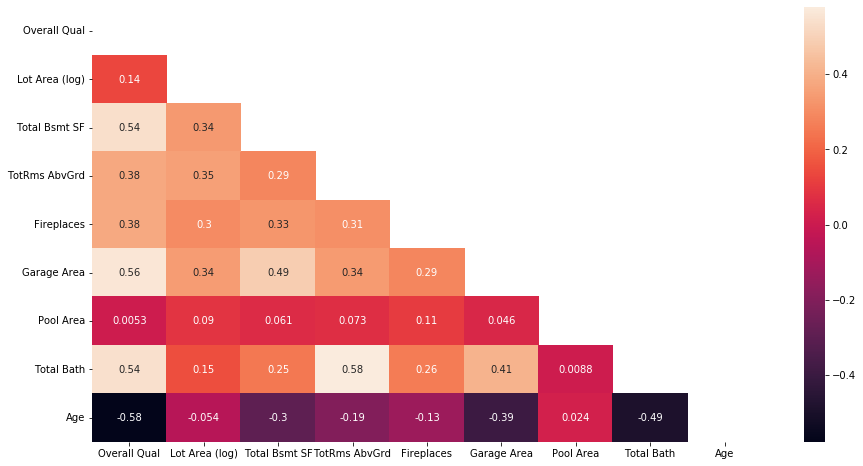

In [14]:
# Correlation table
x_var_corr = df_eda[['Overall Qual', 'Lot Area (log)',
       'Total Bsmt SF', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area',
       'Pool Area', 'Total Bath', 'Age']].corr()

fig = plt.figure(figsize = (15,8))
mask_matrix = np.triu(x_var_corr[['Overall Qual', 'Lot Area (log)',
       'Total Bsmt SF', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area',
       'Pool Area', 'Total Bath', 'Age']].loc[['Overall Qual', 'Lot Area (log)',
       'Total Bsmt SF', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area',
       'Pool Area', 'Total Bath', 'Age']])

sns.heatmap(x_var_corr, annot=True, mask=mask_matrix)


## Exploratory Data Analysis

#### EDA for ordinal variables
For ordinal variables, we observe variability in the sales price for observations of different MS Zoning and Exterior Quality

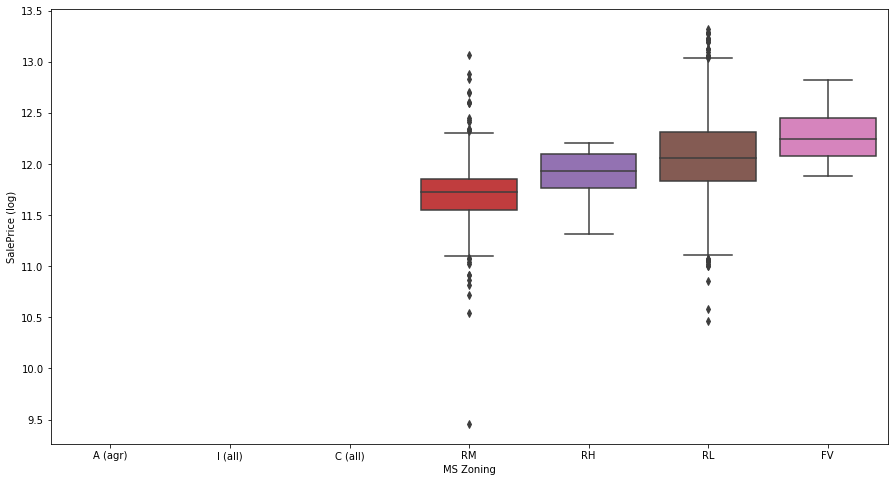

In [15]:
# MS Zoning

fig, ax = plt.subplots(figsize = (15,8))
sns.boxplot(x='MS Zoning', y='SalePrice (log)', data=df_eda, order=['A (agr)', 'I (all)', 'C (all)','RM','RH','RL', 'FV'])

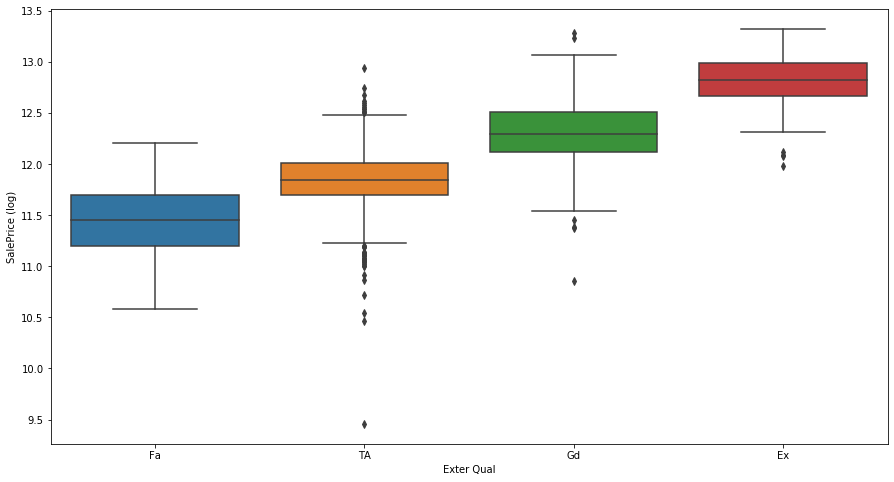

In [16]:
# Exterior Quality

fig, ax = plt.subplots(figsize = (15,8))
sns.boxplot(x='Exter Qual', y='SalePrice (log)', data=df_eda, order=['Fa', 'TA', 'Gd', 'Ex'])

#### EDA for continuous and discrete variables

Text(0.5, 0, 'Age (since remod)')

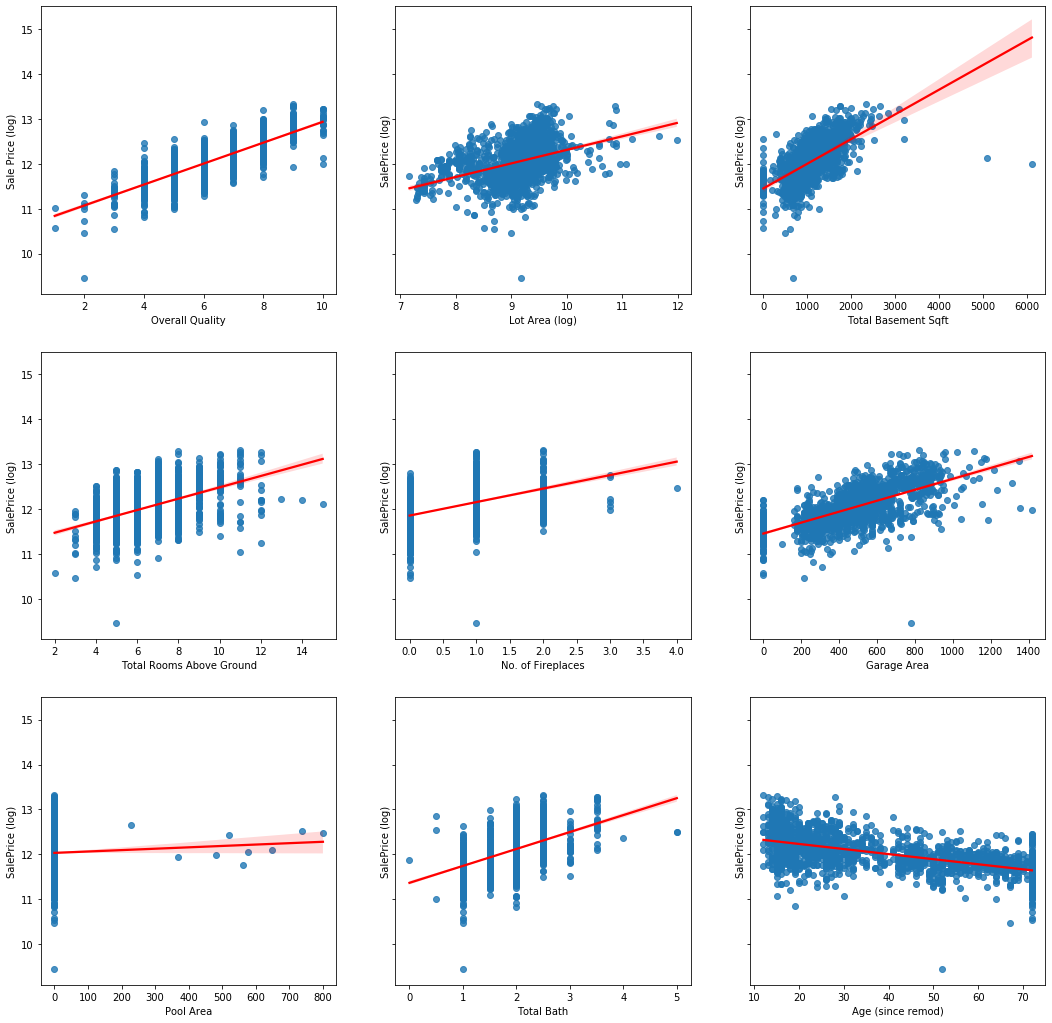

In [17]:
# EDA for continuous/discrete independent variables

fig, axes = plt.subplots(3,3,figsize=(18,18), sharey=True)

sns.regplot(x='Overall Qual', y='SalePrice (log)', data=df_eda, ax=axes[0,0], line_kws={'color' : 'red'})
axes[0,0].set_xlabel('Overall Quality')
axes[0,0].set_ylabel('Sale Price (log)')

sns.regplot(x='Lot Area (log)', y='SalePrice (log)', data=df_eda, ax=axes[0,1], line_kws={'color' : 'red'})
axes[0,1].set_xlabel('Lot Area (log)')

sns.regplot(x='Total Bsmt SF', y='SalePrice (log)', data=df_eda, ax=axes[0,2], line_kws={'color' : 'red'})
axes[0,2].set_xlabel('Total Basement Sqft')

sns.regplot(x='TotRms AbvGrd', y='SalePrice (log)', data=df_eda, ax=axes[1,0], line_kws={'color' : 'red'})
axes[1,0].set_xlabel('Total Rooms Above Ground')

sns.regplot(x='Fireplaces', y='SalePrice (log)', data=df_eda, ax=axes[1,1], line_kws={'color' : 'red'})
axes[1,1].set_xlabel('No. of Fireplaces')

sns.regplot(x='Garage Area', y='SalePrice (log)', data=df_eda, ax=axes[1,2], line_kws={'color' : 'red'})
axes[1,2].set_xlabel('Garage Area')

sns.regplot(x='Pool Area', y='SalePrice (log)', data=df_eda, ax=axes[2,0], line_kws={'color' : 'red'})
axes[2,0].set_xlabel('Pool Area')

sns.regplot(x='Total Bath', y='SalePrice (log)', data=df_eda, ax=axes[2,1], line_kws={'color' : 'red'})
axes[2,1].set_xlabel('Total Bath')

sns.regplot(x='Age', y='SalePrice (log)', data=df_eda, ax=axes[2,2], line_kws={'color' : 'red'})
axes[2,2].set_xlabel('Age (since remod)')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed36db7e50>,
      dtype=object)

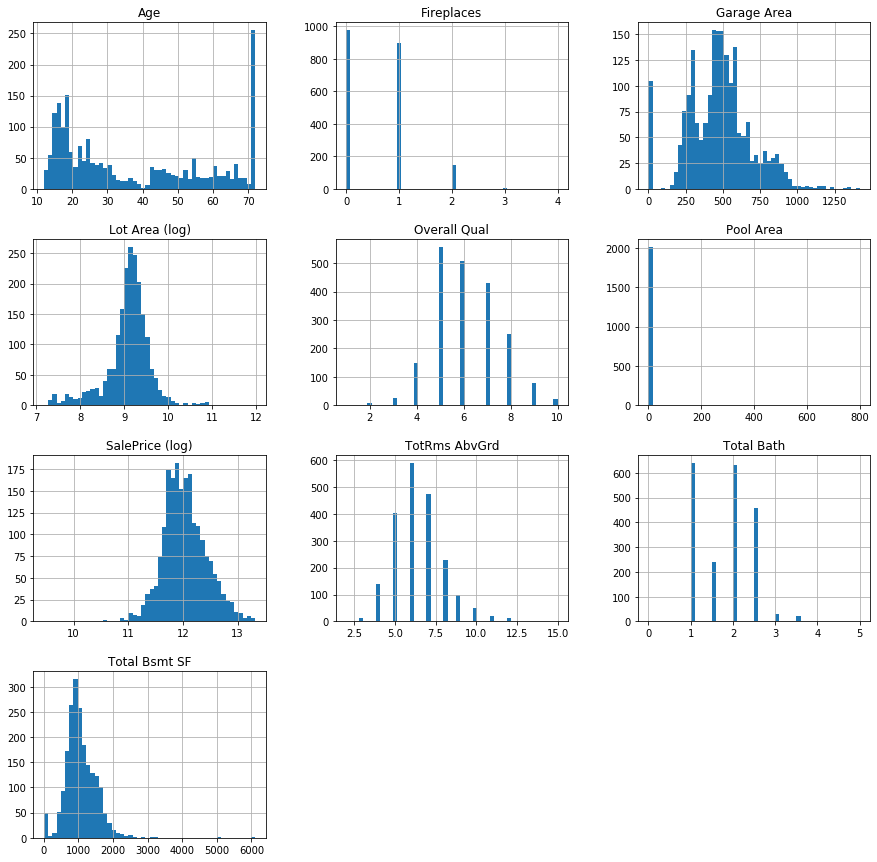

In [18]:
df_eda.hist(figsize=(15,15), bins=50)

The observations for pool area do not sufficiently explain the variability in sales price due to its skewed distribution.
<br>__As such, we will drop variables from the Pool category__

In [19]:
# Create full dataframe with dependent and independent variables

df_reg = df_eda.copy()

In [20]:
# Drop Pool Area

df_reg.drop(columns='Pool Area', inplace=True)
df_test.drop(columns='Pool Area', inplace=True)

## Prepare dataset for regression

In [21]:
# Create X and y dataframes

X_var = ['Overall Qual','MS Zoning','Lot Area (log)','Age','Exter Qual','Total Bsmt SF','Total Bath',
         'TotRms AbvGrd','Fireplaces','Garage Area']

X = df_reg[X_var]
y = df_reg['SalePrice (log)']

In [22]:
# Preparing the data for regression

# Create dummy variables for MS Zoning and Exter Qual
# Drop lowest quality rating for Exter Qual (Ex: Excellent, Gd: Good, TA: Average/Typical, Fa: Fair, Po: Poor)
# Since there are no 'Po' observations, drop 'Fa' instead

X_reg = pd.get_dummies(columns=['MS Zoning', 'Exter Qual'], data=X).drop(columns=['Exter Qual_Fa'], axis=1)

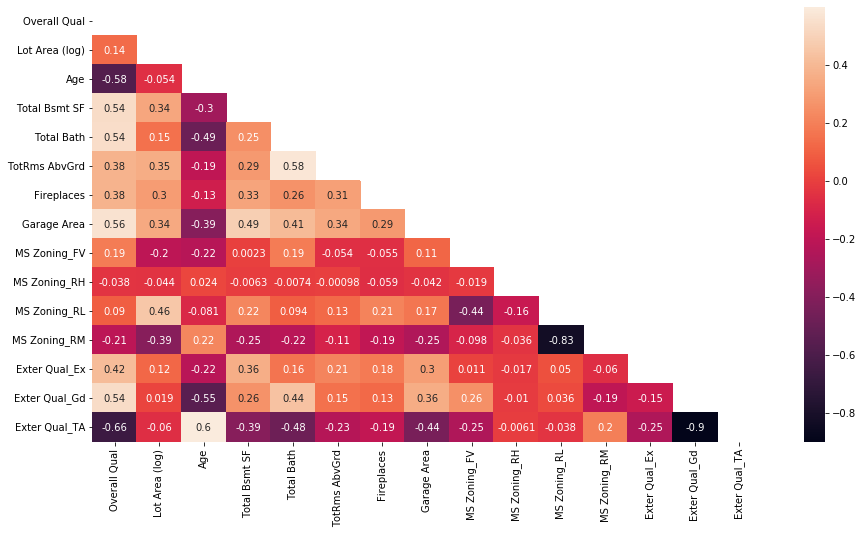

In [23]:
# Correlation matrix

fig = plt.figure(figsize=(15,8))
matrix1 = np.triu(X_reg.corr()[['Overall Qual', 'Lot Area (log)', 'Age', 'Total Bsmt SF', 'Total Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Area', 'MS Zoning_FV',
       'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Exter Qual_Ex',
       'Exter Qual_Gd', 'Exter Qual_TA']].loc[['Overall Qual', 'Lot Area (log)', 'Age', 'Total Bsmt SF', 'Total Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Area','MS Zoning_FV',
       'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Exter Qual_Ex',
       'Exter Qual_Gd', 'Exter Qual_TA']])
sns.heatmap(X_reg.corr(), annot=True, mask=matrix1)

In [24]:
# Assign regression model class to variables

lr = LinearRegression()
lasso = LassoCV(n_alphas=100)
ridge = RidgeCV(alphas=np.linspace(0.1,10,100))

#### Create null model by using mean sale price as y_train observations

In [25]:
saleprice_mean = np.mean(df_reg['SalePrice (log)'])
y_dummy = pd.Series(saleprice_mean, index=range(len(df_reg)))

In [26]:
X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(X_reg, y_dummy, random_state=100, train_size=0.7)

lr_dummy_model = lr.fit(X_train_dummy, y_train_dummy)
display(lr.score(X_train_dummy, y_train_dummy))

0.0

#### Generate train/test sets for regression

In [27]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X_reg, y, random_state=100, train_size=0.8)

X_train.columns

Index(['Overall Qual', 'Lot Area (log)', 'Age', 'Total Bsmt SF', 'Total Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Area', 'MS Zoning_FV',
       'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Exter Qual_Ex',
       'Exter Qual_Gd', 'Exter Qual_TA'],
      dtype='object')

#### Cross validation to compare regression types
<br>Linear regression performs the best of the 3

In [28]:
# Generate cross validation scores to compare regression fit

lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)

In [29]:
display(lr_scores.mean())
display(lasso_scores.mean())
display(ridge_scores.mean())

0.8337389885278174

0.6870610168771548

0.8336967579378568

### Linear Regression Model

In [30]:
lr_model = lr.fit(X_train, y_train)
display(lr.score(X_train, y_train))
display(lr.score(X_test, y_test))

0.8481116790229709

0.7874319226464821

Our train test gives us at R2 score of 84.8%, while the test set gives a score of 78.7%
<br>There is mild evidence of overfitting the model

In [31]:
y_pred = lr.predict(X_test)

Text(0.5, 0, 'Coefficient')

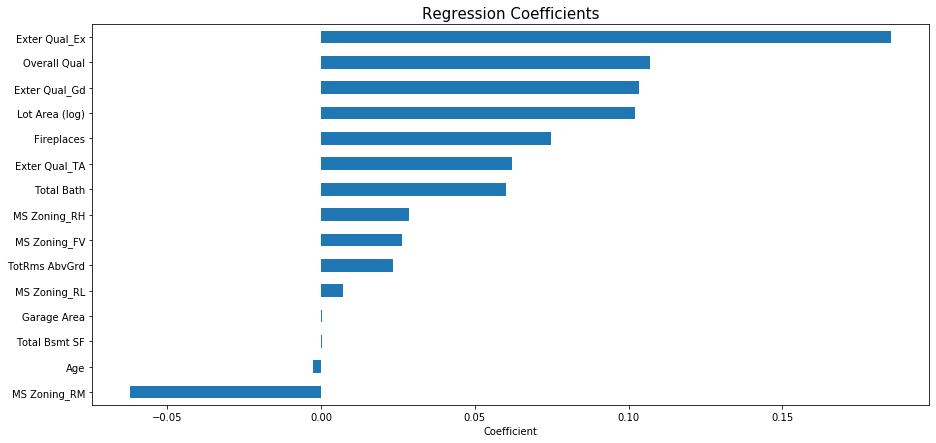

In [32]:
features = ['Overall Qual', 'Lot Area (log)', 'Age', 'Total Bsmt SF', 'Total Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Area', 'MS Zoning_FV',
       'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Exter Qual_Ex',
       'Exter Qual_Gd', 'Exter Qual_TA']

pd.Series(lr.coef_, index=features).sort_values().plot.barh(figsize=(15,7))
plt.title('Regression Coefficients', size=15)
plt.xlabel('Coefficient')

In [33]:
display(pd.Series(lr.coef_, index=features).sort_values(ascending=False))
display(lr.score(X_train, y_train))
display(mean_squared_error(y_test, y_pred))

Exter Qual_Ex     0.185399
Overall Qual      0.107044
Exter Qual_Gd     0.103505
Lot Area (log)    0.102168
Fireplaces        0.074648
Exter Qual_TA     0.062167
Total Bath        0.060035
MS Zoning_RH      0.028728
MS Zoning_FV      0.026300
TotRms AbvGrd     0.023458
MS Zoning_RL      0.007083
Garage Area       0.000236
Total Bsmt SF     0.000127
Age              -0.002628
MS Zoning_RM     -0.062111
dtype: float64

0.8481116790229709

0.03099821746553986

#### Interpreting coefficients
Our baseline is for houses with Fair external quality, with no MS Zoning specified

_Dummy Variables_
<br>An excellent (Ex) external quality is predicted to have a sale price approximately 23.8% more than a Fair (Fa) external quality home, ceteris paribus

_Continuous Variables_
<br>An increase in the overall quality score of the house by one unit is predicted to have a sale price approximately 10.4% higher, ceteris paribus

## Standardized Test (for magnitude)

In [34]:
# Test standardized coefficients

scaler = StandardScaler()

X_reg_scaled = X_reg.copy()
X_reg_scaled = pd.DataFrame(scaler.fit_transform(X_reg_scaled), columns=features)
X_reg_scaled.head()

,Overall Qual,Lot Area (log),Age,Total Bsmt SF,Total Bath,TotRms AbvGrd,Fireplaces,Garage Area,MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Exter Qual_Ex,Exter Qual_Gd,Exter Qual_TA
0,-0.101358,0.835234,-0.982557,-0.757197,1.147294,-0.286687,-0.935925,-0.006189,-0.228998,-0.083395,0.518132,-0.42814,-0.204019,1.382880,-1.243576
1,0.612017,0.511966,-0.599466,-0.336777,1.147294,0.996126,0.629356,0.385531,-0.228998,-0.083395,0.518132,-0.42814,-0.204019,1.382880,-1.243576
2,-0.814732,-0.229008,-1.078330,-0.014753,-1.211291,-0.928094,-0.935925,-1.074091,-0.228998,-0.083395,0.518132,-0.42814,-0.204019,-0.723129,0.804132
3,-0.814732,0.195137,-1.078330,-1.519768,1.147294,0.354720,-0.935925,-0.355938,-0.228998,-0.083395,0.518132,-0.42814,-0.204019,-0.723129,0.804132
4,-0.101358,0.938322,-0.407920,-0.866775,0.361099,-0.286687,-0.935925,0.035781,-0.228998,-0.083395,0.518132,-0.42814,-0.204019,-0.723129,0.804132


In [35]:
X_train_scaled, X_test_scaled, y_train_1, y_test_1 = train_test_split(X_reg_scaled, y, random_state=1, train_size=0.7)

In [36]:
lr.fit(X_train_scaled, y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 0, 'Coefficients')

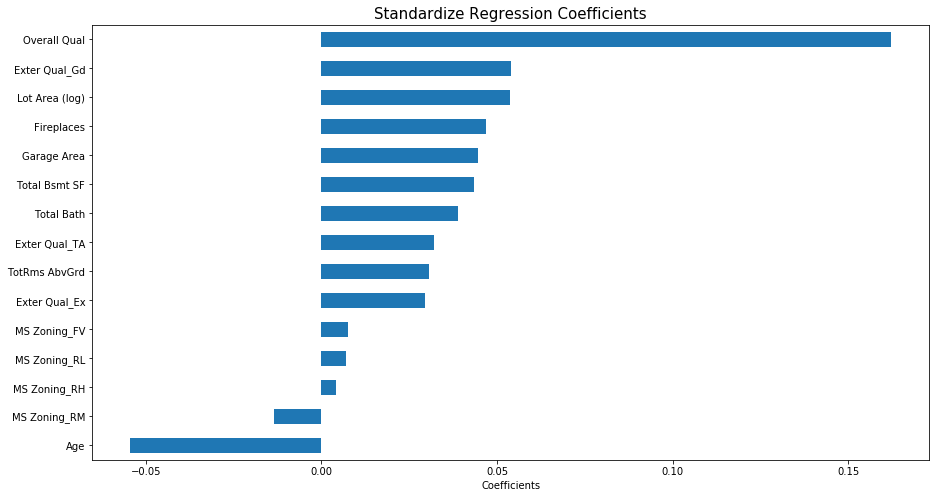

In [37]:
pd.Series(lr.coef_, index=features).sort_values().plot.barh(figsize=(15,8))
plt.title('Standardize Regression Coefficients', size=15)
plt.xlabel('Coefficients')

In [38]:
pd.Series(lr.coef_, index=features).sort_values(ascending=False)

Overall Qual      0.162272
Exter Qual_Gd     0.053862
Lot Area (log)    0.053749
Fireplaces        0.046852
Garage Area       0.044538
Total Bsmt SF     0.043339
Total Bath        0.038843
Exter Qual_TA     0.031989
TotRms AbvGrd     0.030564
Exter Qual_Ex     0.029466
MS Zoning_FV      0.007685
MS Zoning_RL      0.007126
MS Zoning_RH      0.004254
MS Zoning_RM     -0.013641
Age              -0.054449
dtype: float64

Using standardized independent variables allows us to compare the magnitudes of impact for each coefficient. Overall quality has the largest impact on predicted sale prices. An increase in one standard deviation in overall quality will lead to a 0.162 standard deviation increase in house price.

### Kaggle RMSE
This section is for the online submission on Kaggle: https://www.kaggle.com/t/2dde5663e03b4165b853ff65e723c26d

In [39]:
#X_reg_kaggle = pd.get_dummies(columns=['MS Zoning', 'Exter Qual'], data=df_test).drop(columns=['Exter Qual_Fa'], axis=1)

In [40]:
# Add MS Zoning_A (agr) column with zero values

#X_reg_kaggle['MS Zoning_A (agr)'] = 0

In [41]:
#y_pred_kaggle = lr.predict(X_reg_kaggle[['Overall Qual', 'Lot Area (log)', 'Age', 'Total Bsmt SF', 'Total Bath',
#'TotRms AbvGrd', 'Fireplaces', 'Garage Area', 'MS Zoning_A (agr)',
#'MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)',
#'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Exter Qual_Ex',
#'Exter Qual_Gd', 'Exter Qual_TA']])

In [42]:
#kaggle_df = pd.DataFrame(data={'Id' : df_test_set['Id'].values, 'SalePrice' : np.exp(y_pred_kaggle)})

#kaggle_df.set_index('Id')

In [43]:
# Export to csv

#kaggle_df.to_csv('kaggle/kaggleoutput.csv')